In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
#abrir arquivo e armazena-lo em um dataframe
path = "/home/gregorio/Downloads/abalone.data"
arquivo = pd.read_csv(path, names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'] )
arquivo.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
arquivo.shape

(4177, 9)

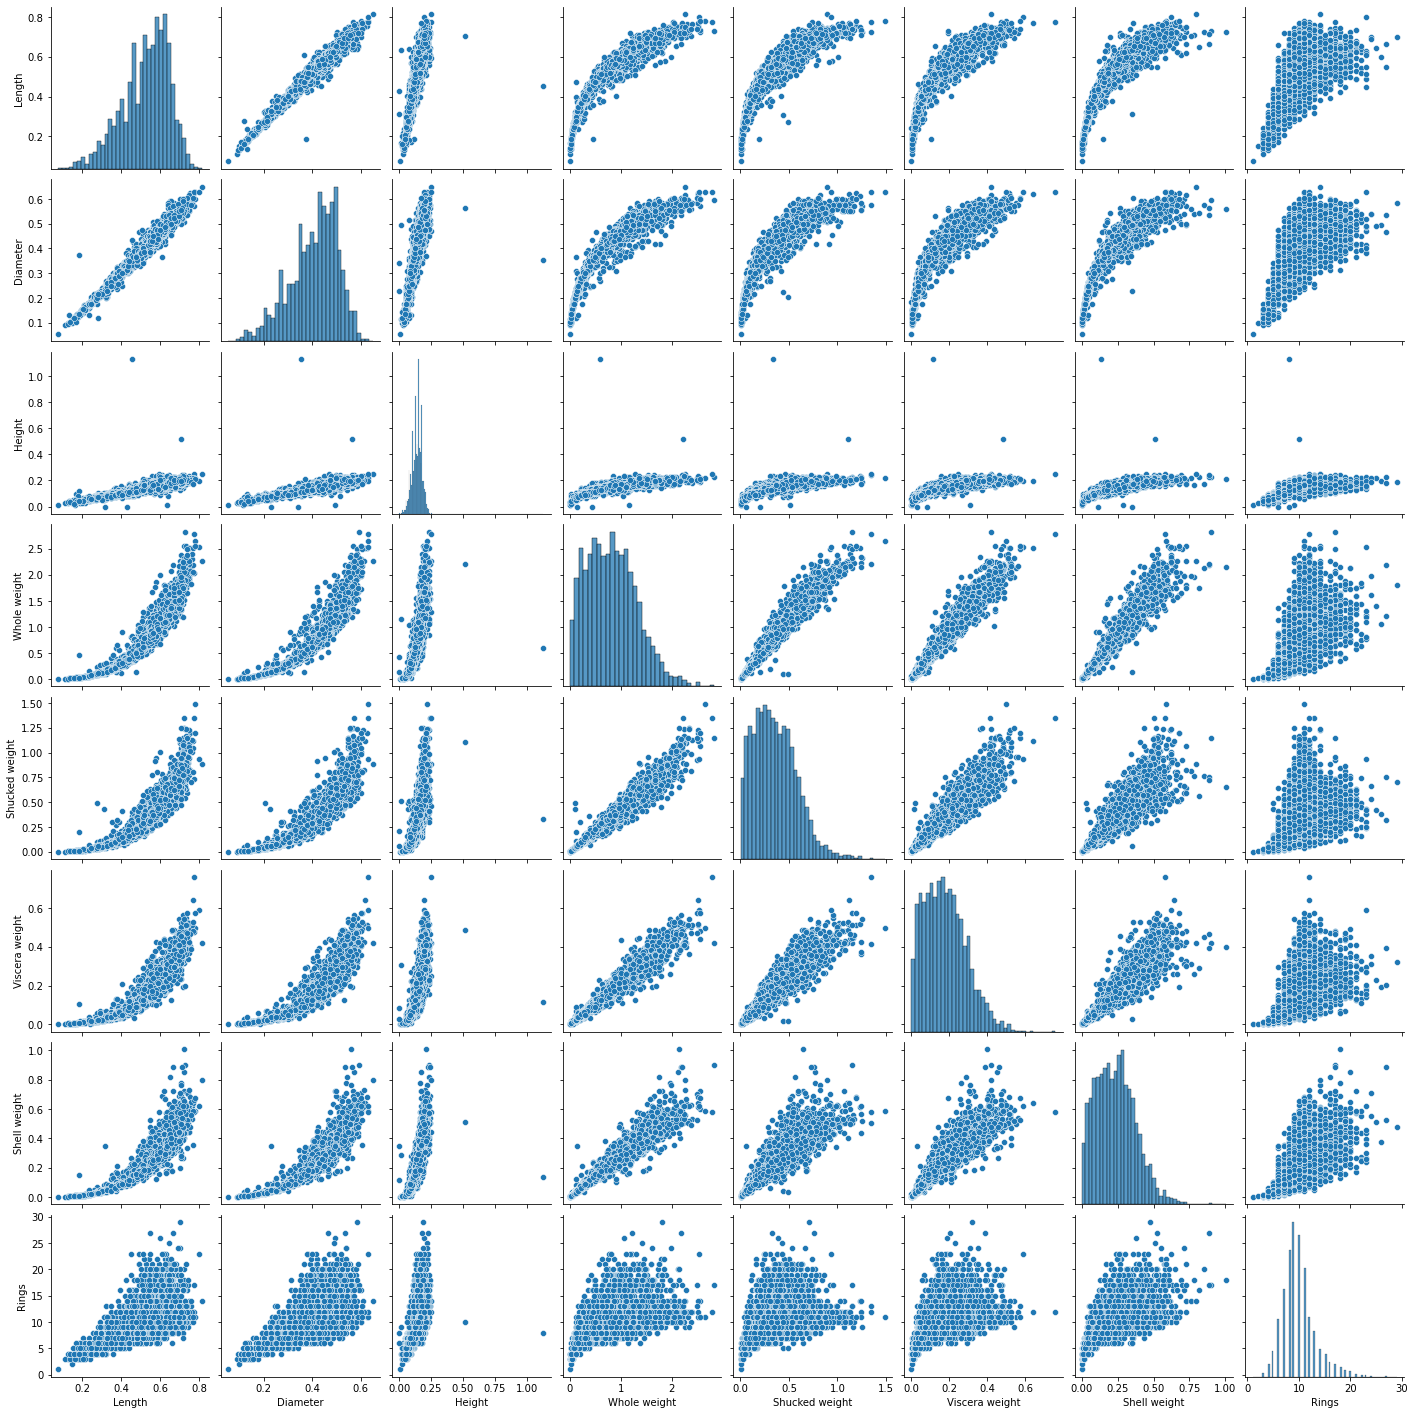

In [3]:
#plotando matriz de dispersão com seaborn 
sns.pairplot(arquivo)

array([[<AxesSubplot:xlabel='Length', ylabel='Length'>,
        <AxesSubplot:xlabel='Diameter', ylabel='Length'>,
        <AxesSubplot:xlabel='Height', ylabel='Length'>,
        <AxesSubplot:xlabel='Whole weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Shucked weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Viscera weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Shell weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Rings', ylabel='Length'>],
       [<AxesSubplot:xlabel='Length', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Diameter', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Height', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Whole weight', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Shucked weight', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Viscera weight', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Shell weight', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Rings', ylabel='Diameter'>],
       [<AxesSubplot:xlabel=

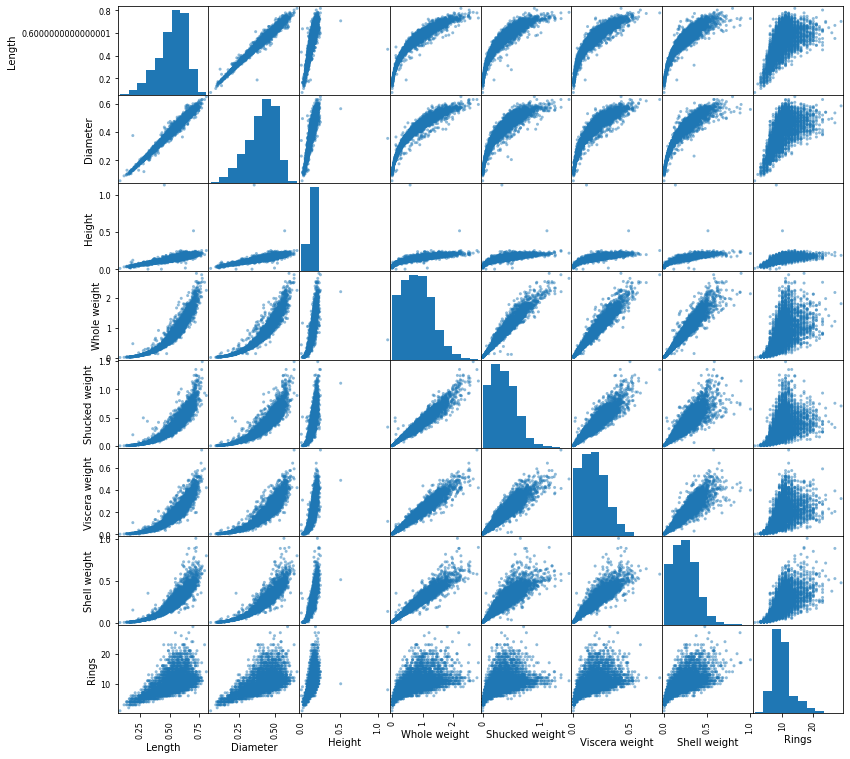

In [12]:
#plotando matriz de dispersão com matplotlib
pd.plotting.scatter_matrix(arquivo, figsize = (13,13))

<AxesSubplot:>

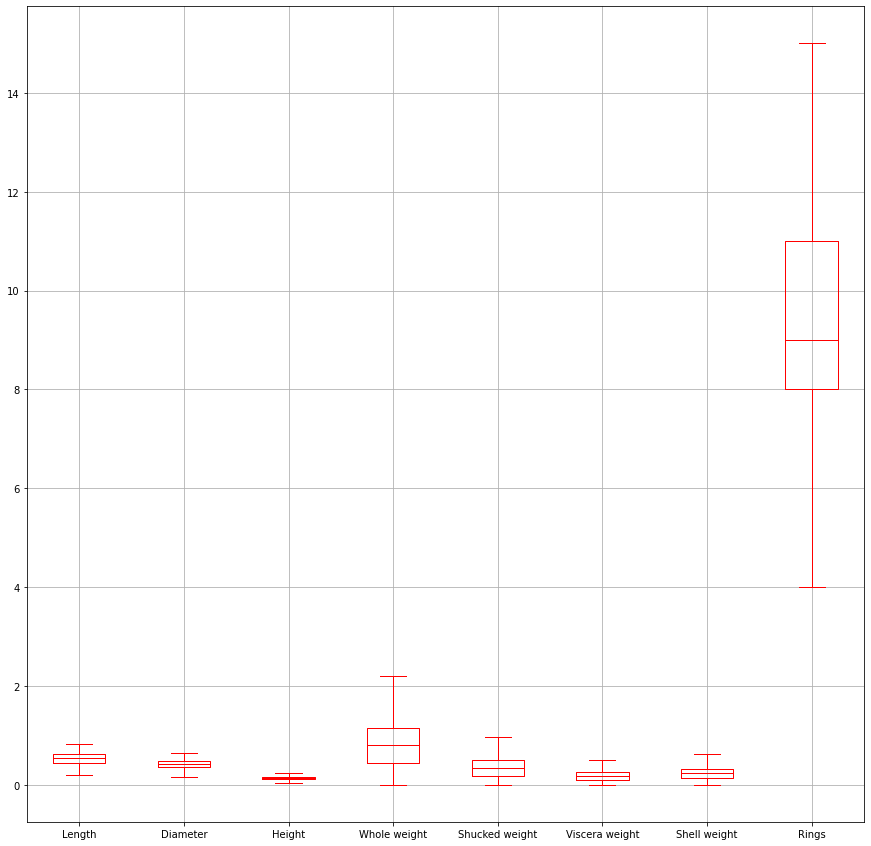

In [5]:
#plotando os boxplots do dataframe sem outliers
arquivo.boxplot(showfliers=False, figsize = (15,15), color = 'red')

<AxesSubplot:>

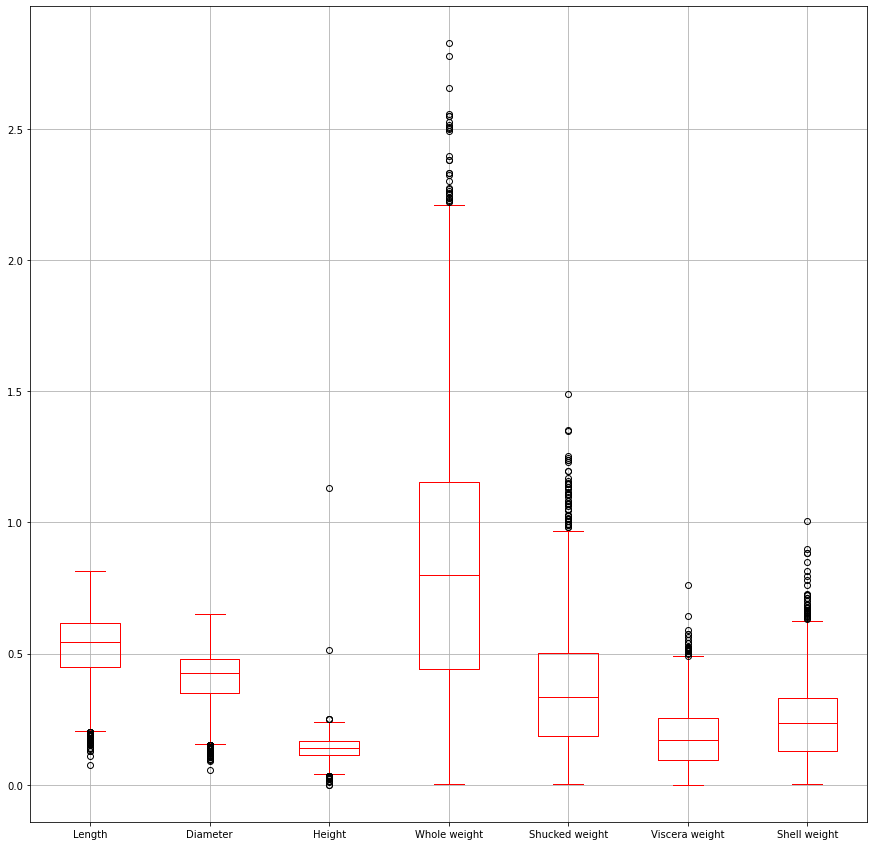

In [6]:
#plotando os boxplots das primeiras colunas do dataframe com outliers
arquivo.boxplot(column=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'],showfliers=True, figsize = (15,15), color = 'red')

<AxesSubplot:>

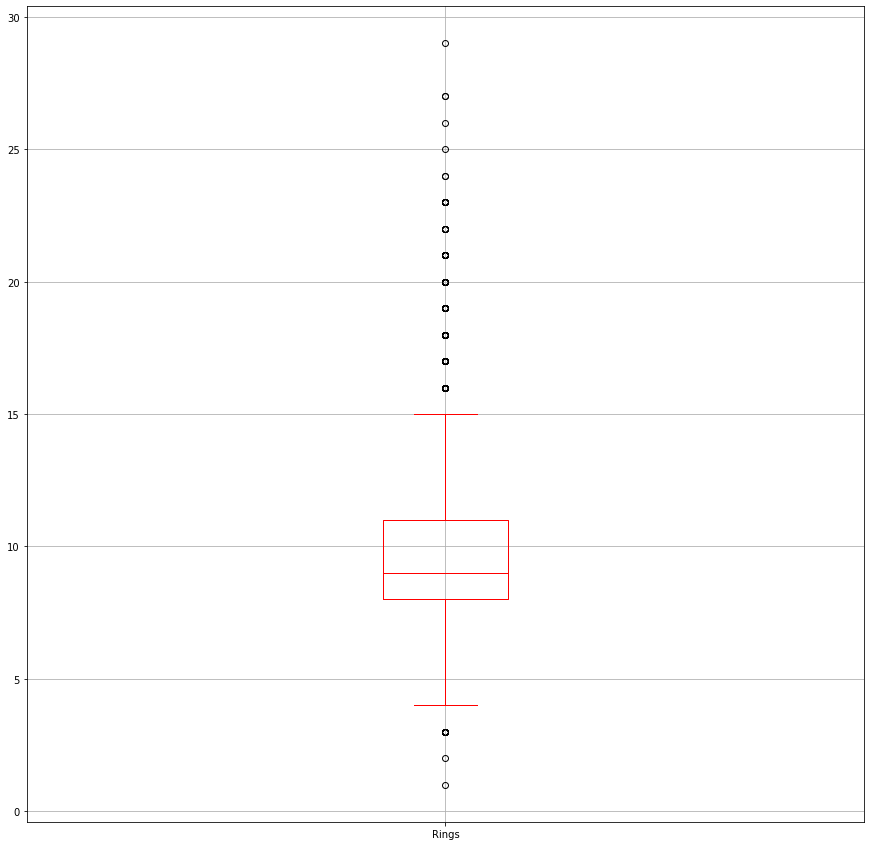

In [12]:
#plotando o boxplot da ultima coluna do dataframe com outliers
arquivo.boxplot(column=['Rings'], showfliers=True, figsize = (15,15), color = 'red')

In [39]:
#inicio do algoritmo knn

k=5 #quantidade de neighbors 
acc_train = []
acc_test = []

x = arquivo.iloc[:, 1:8].values #colunas com valores numericos
y = arquivo.iloc[:, 0].values #coluna com o sexo (target)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #separando os dados em 80% treino e 20% teste

#realizando normalização dos valores
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#realizando o treino e teste
classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

#salvando resultados em lista
acc_train.append(classifier.score(x_train, y_train))
acc_test.append(classifier.score(x_test, y_test))


Acuracia do K-Nearest Neighbors no Treinamento: 0.67
Acuracia do K-Nearest Neighbors no Teste: 0.54

              precision    recall  f1-score   support

           F       0.45      0.48      0.47       264
           I       0.66      0.77      0.71       262
           M       0.50      0.41      0.45       310

    accuracy                           0.54       836
   macro avg       0.54      0.55      0.54       836
weighted avg       0.54      0.54      0.54       836



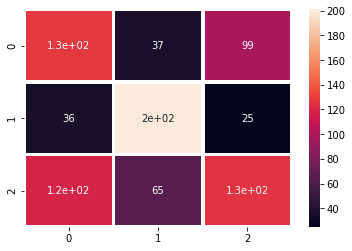

In [40]:
#apresentando os resultados

print('\nAcuracia do K-Nearest Neighbors no Treinamento: {:.2f}'.format(acc_train[0]))
print('Acuracia do K-Nearest Neighbors no Teste: {:.2f}'.format(acc_test[0]))
print()
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in range(3)],columns = [i for i in range(3)])
sns.heatmap(df_cm, annot=True, linewidths=2.5)
print (classification_report(y_test, y_pred))